## The Sparks Foundation Data Science and Business Analytics Internship

## Task 1

##### Author: Nabeel Bin Riaz 

### Linear regression model for predicting scores of students.

The following notebook shows steps for building a machine learning model which predicts the scores of students by taking the hours they study per day as input. This model is a simple linear regression model which has one feature and one target variable. 

### Step 1: Importing all necessary libraries
At first all the useful libraries are imported.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: importing and understanding data
We import the data directly from the web and then analyze the data types, data distribution and all the other data attributes.

In [28]:
url='http://bit.ly/w-data'
df=pd.read_csv(url)

In [29]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [30]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here we are checking for any null values in the dataframe

In [80]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

THere are no null values in the dataframe. Lets check for any outliers.

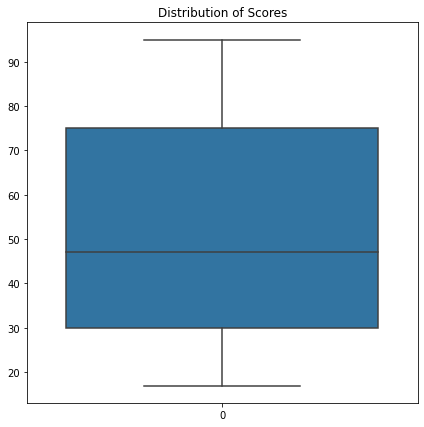

In [103]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df["Scores"])
plt.title('Distribution of Scores')
plt.show()

This above plot shows the distribution of scores. Thankfully, all the values lies within the distribution and there are no outliers in the data.

### Step 3: Data Visualization
As there are no outliers or null values, our data is now ready for visual analysis and exploration

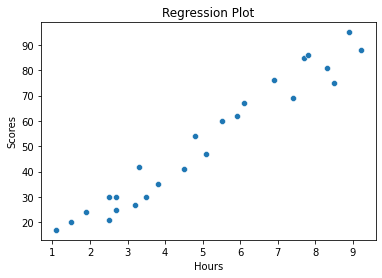

In [82]:
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.title('Scatter Plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

The above plot shows the relation of hours students study per day with the score they achieve.

Now, lets do something interesting.

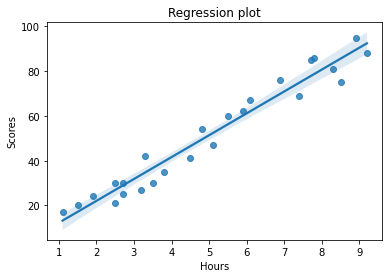

In [107]:
sns.regplot(x='Hours',y='Scores',data=df)

plt.title('Regression plot')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

This plot shows us the regression line which relates our variables. We can see a good positive linear correlation between the both variables. This shows us that the best model for prediction will be a linear regression model.

### Step 4: Model Building and predictions
Now that we have decided what model to choose, lets build and train our model for predictions

The first step in model building is to divide our dataset into test and train datasets. We are taking 70% of data as training data and 30% data as testing data.

In [132]:
X_train, X_test, y_train, y_test = train_test_split(df['Hours'], df['Scores'], test_size=0.3, random_state=0)


Lets build our model, train it and test it.

In [133]:
lr = LinearRegression()

In [134]:
lr.fit(X_train.to_numpy().reshape(-1, 1), y_train)

LinearRegression()

In [135]:
y_pred = lr.predict(X_test.to_numpy().reshape(-1, 1))

In [136]:
df1 = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})  
df1 = df1.reset_index(drop=True)
df1 

,Actual,Prediction
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


The above dataframe shows the actual values and the values that our model predicted.

### Step 5: Model Evaluation
Now lets see how well our model has performed

In [138]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



In [139]:
print('Mean squared error:', mse)
print('R-squared:', r2)


Mean squared error: 22.96509721270043
R-squared: 0.9568211104435257


The values of Mean squared error and R-squared score shows that our model has performed well with an accuracy of 95%

Now lets visualize the Performance

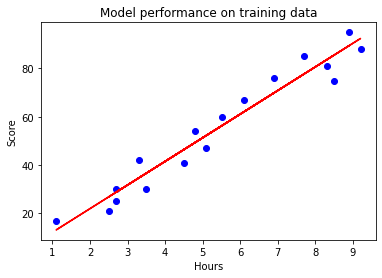

In [126]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, lr.predict(X_train.to_numpy().reshape(-1, 1)), color='red')
plt.title('Model performance on training data')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

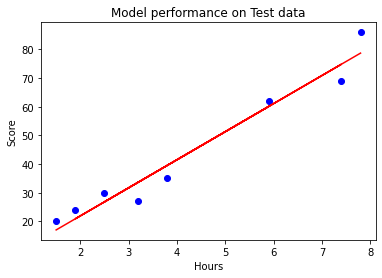

In [127]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('Model performance on Test data')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

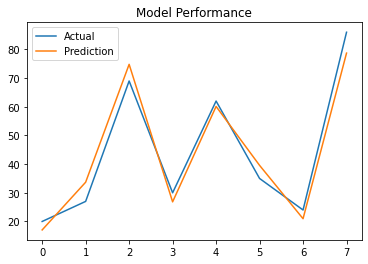

In [129]:
df1.plot()
plt.title('Model Performance')
plt.show()

The above three plots shows graphically how our model performed and how accurately it predicted the values.

### Task Goal
Our main goal was to predict the score of a student who studies 9.25 hours per day.
Below is the solution

In [79]:
prediction_hrs=np.array([[9.25]])
predicted_scr=lr.predict(prediction_hrs)
print('The predicted score for a student Studying 9.25 hours a day using our model is ',predicted_scr)

The predicted score for a student Studying 9.25 hours a day using our model is  [92.91505723]
